### NOTE: Neither the lines of code nor text have been proofread and some of the writing have been taken directly from the OpenCV documentation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Template Matching

**Theory and Template Matching in OpenCV**

This is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function <code>cv.matchTemplate()</code> for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. It returns a grayscale image, where each pixel denotes how much the neighbourhood of that pixel matches with template.

If input image is of size (W &times; H) and template image is of size (w &times; h), output image will have a size of (W-w+1, H-h+1). Once you got the result, you can use <code>cv.minMaxLoc()</code> function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.

Note
<br>
If you are using <code>cv.TM_SQDIFF</code> as comparison method, minimum value gives the best match.

***Single Object***

In [2]:
img = cv.imread('bank_images/test11.png', cv.IMREAD_GRAYSCALE)

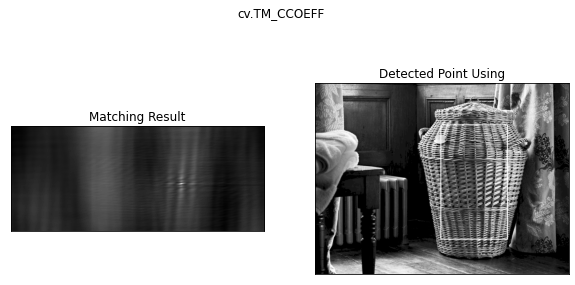

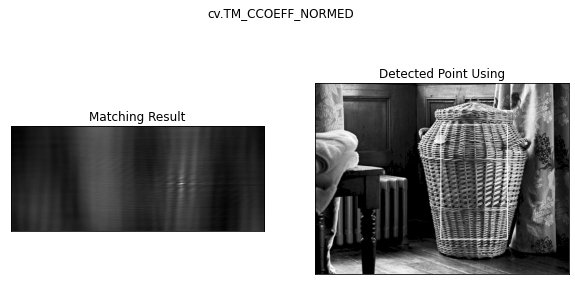

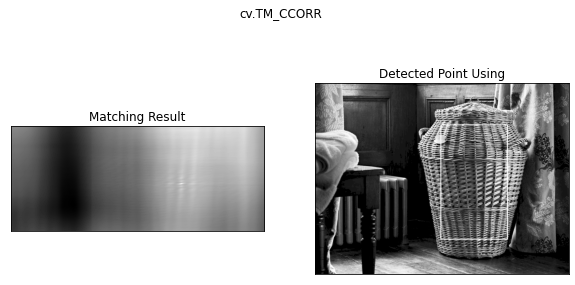

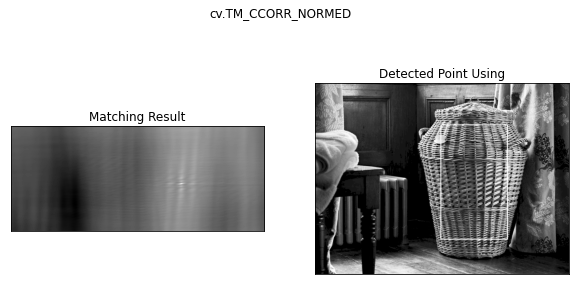

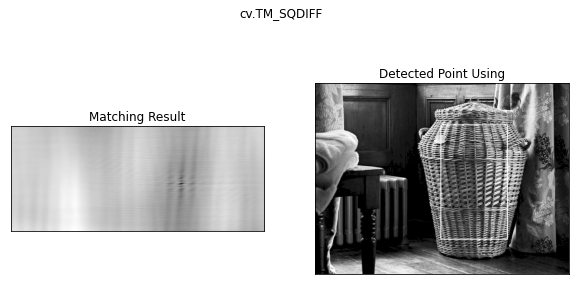

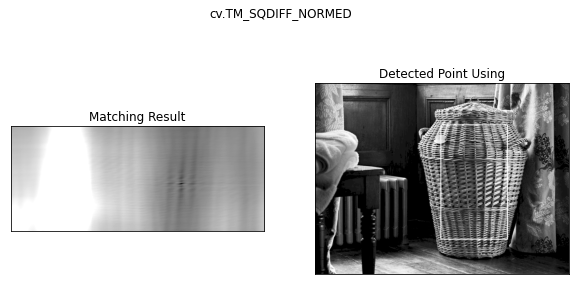

In [16]:
img2 = img.copy()
template = cv.imread('bank_images/test11_basketextract.png', cv.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(10,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point Using'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

***Multiple Objects***

In this case, <code>cv.minMaxLoc()</code> won't give you all the locations. Instead, use *thresholding* (not to be confused with <code>cv.threshold()</code>, which is used in binary images). 

In the example below, I am detecting all the rings in the image and enclosing each with a red rectangle

(<AxesSubplot:>,
 ([], []),
 ([], []))

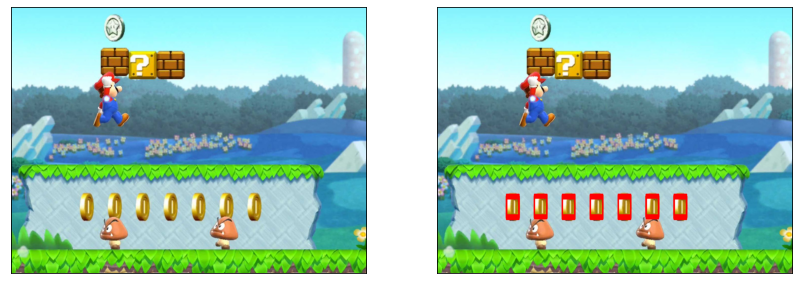

In [12]:
# Read main image
img = cv.imread('bank_images/test16.png')

# Make a copy for comparison purposes
img2 = img.copy()

# Convert read main image to grayscale
img_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Read template
template = cv.imread('bank_images/test16_ring.png')

# Convert read template to grayscale
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Match template
w, h = template_gray.shape[::-1]
res = cv.matchTemplate(img_gray,template_gray,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rgb_img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,11))
plt.subplot(1,2,1), plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(rgb_img2), plt.xticks([]), plt.yticks([])

### Hough Transform

This enables you detect a shape in an image (as long as the shape can be represented mathematically—that's the tricky part!)

**Straight Lines**

A straight line can easily be represented mathematically; OpenCV uses <code>cv.HoughLines()</code> and <code>cv.HoughLinesP()</code> to detect them. For the theory and coding examples, see:
<br>
https://docs.opencv.org/3.4/d6/d10/tutorial_py_houghlines.html

**Circles**

A circle can also easily be represented mathematically; OpenCV uses <code>cv.HoughCircles()</code>. For coding example, see:
<br>
https://docs.opencv.org/3.4/da/d53/tutorial_py_houghcircles.html